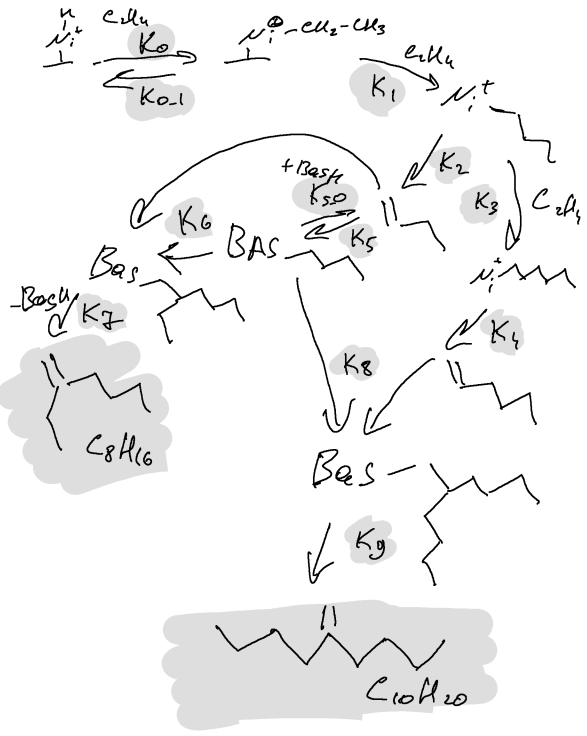
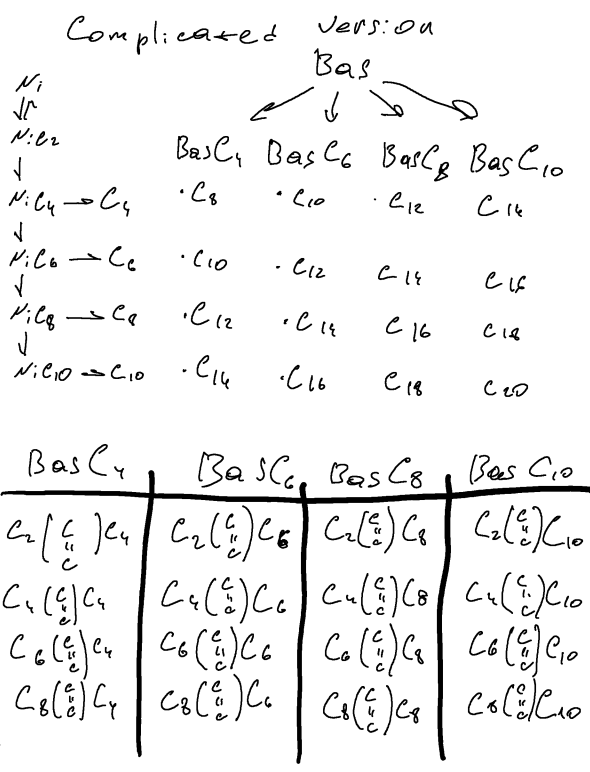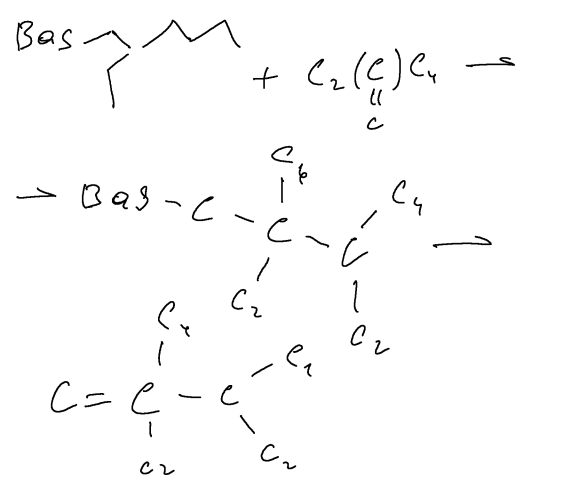

# Influence of diffusion of products out of reactor

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import seaborn as sns
from reactor import Reaction
np.random.seed(42)

def get_analysis(
                d_linear, d_branched,
                k_grow_bas, k_death_bas,
                k_grow_bas_br, k_death_bas_br,
                k_grow_ni, k_death_ni,
                ):

    reaction_list = [
                    ['Ni + C2 <-> NiC2',    k_grow_ni[0], k_grow_ni[0] * 0.1],
                    ['NiC2 + C2 <-> NiC4',   k_grow_ni[1], k_grow_ni[1] * 0.1],['NiC4 -> C4 + Ni',      k_death_ni[0]],
                    ['NiC4 + C2 <-> NiC6',   k_grow_ni[2], k_grow_ni[2] * 0.1],['NiC6 -> C6 + Ni',      k_death_ni[1]],
                    ['NiC6 + C2 <-> NiC8',   k_grow_ni[3], k_grow_ni[3] * 0.1],['NiC8 -> C8 + Ni',      k_death_ni[2]],
                    ['NiC8 + C2 <-> NiC10',  k_grow_ni[4], k_grow_ni[4] * 0.1],['NiC10 -> C10 + Ni',    k_death_ni[3]],
                    
                    ['C4 -> C4_diff', d_linear[0]], ['C6 -> C6_diff', d_linear[1]], ['C8 -> C8_diff', d_linear[2]], ['C10 -> C10_diff', d_linear[3]],
                    
                    ['Bas + C4 <-> BasC4_0',         k_grow_bas[0, 0], k_grow_bas[0, 0] * 0.1],
                    ['BasC4_0 + C4 <-> BasC8_0',     k_grow_bas[0, 1], k_grow_bas[0, 1] * 0.1],['BasC8_0 -> C8_0 + Bas',     k_death_bas[0, 0]],
                    ['BasC4_0 + C6 <-> BasC10_0',    k_grow_bas[0, 2], k_grow_bas[0, 2] * 0.1],['BasC10_0 -> C10_0 + Bas',   k_death_bas[0, 1]],
                    ['BasC4_0 + C8 <-> BasC12_0',    k_grow_bas[0, 3], k_grow_bas[0, 3] * 0.1],['BasC12_0 -> C12_0 + Bas',   k_death_bas[0, 2]],
                    ['BasC4_0 + C10 <-> BasC14_0',   k_grow_bas[0, 4], k_grow_bas[0, 4] * 0.1],['BasC14_0 -> C14_0 + Bas',   k_death_bas[0, 3]],

                    ['Bas + C6 <-> BasC6_1',         k_grow_bas[1, 0], k_grow_bas[1, 0] * 0.1],
                    ['BasC6_1 + C4 <-> BasC10_1',    k_grow_bas[1, 1], k_grow_bas[1, 1] * 0.1],['BasC10_1 -> C10_1 + Bas',   k_death_bas[1, 0]],
                    ['BasC6_1 + C6 <-> BasC12_1',    k_grow_bas[1, 2], k_grow_bas[1, 2] * 0.1],['BasC12_1 -> C12_1 + Bas',   k_death_bas[1, 1]],
                    ['BasC6_1 + C8 <-> BasC14_1',    k_grow_bas[1, 3], k_grow_bas[1, 3] * 0.1],['BasC14_1 -> C14_1 + Bas',   k_death_bas[1, 2]],
                    ['BasC6_1 + C10 <-> BasC16_1',   k_grow_bas[1, 4], k_grow_bas[1, 4] * 0.1],['BasC16_1 -> C16_1 + Bas',   k_death_bas[1, 3]],

                    ['Bas + C8 <-> BasC8_2',         k_grow_bas[2, 0], k_grow_bas[2, 0] * 0.1],
                    ['BasC8_2 + C4 <-> BasC12_2',    k_grow_bas[2, 1], k_grow_bas[2, 1] * 0.1],['BasC12_2 -> C12_2 + Bas',   k_death_bas[2, 0]],
                    ['BasC8_2 + C6 <-> BasC14_2',    k_grow_bas[2, 2], k_grow_bas[2, 2] * 0.1],['BasC14_2 -> C14_2 + Bas',   k_death_bas[2, 1]],
                    ['BasC8_2 + C8 <-> BasC16_2',    k_grow_bas[2, 3], k_grow_bas[2, 3] * 0.1],['BasC16_2 -> C16_2 + Bas',   k_death_bas[2, 2]],
                    ['BasC8_2 + C10 <-> BasC18_2',   k_grow_bas[2, 4], k_grow_bas[2, 4] * 0.1],['BasC18_2 -> C18_2 + Bas',   k_death_bas[2, 3]],

                    ['Bas + C10 <-> BasC10_3',       k_grow_bas[3, 0], k_grow_bas[3, 0] * 0.1],
                    ['BasC10_3 + C4 <-> BasC14_3',   k_grow_bas[3, 1], k_grow_bas[3, 1] * 0.1],['BasC14_3 -> C14_3 + Bas',   k_death_bas[3, 0]],
                    ['BasC10_3 + C6 <-> BasC16_3',   k_grow_bas[3, 2], k_grow_bas[3, 2] * 0.1],['BasC16_3 -> C16_3 + Bas',   k_death_bas[3, 1]],
                    ['BasC10_3 + C8 <-> BasC18_3',   k_grow_bas[3, 3], k_grow_bas[3, 3] * 0.1],['BasC18_3 -> C18_3 + Bas',   k_death_bas[3, 2]],
                    ['BasC10_3 + C10 <-> BasC20_3',  k_grow_bas[3, 4], k_grow_bas[3, 4] * 0.1],['BasC20_3 -> C20_3 + Bas',   k_death_bas[3, 3]],

                    ['BasC8_0 + C8_0 <-> BasC16_4',  k_grow_bas_br[0, 0], k_grow_bas_br[0, 0] * 0.1],['BasC16_4 -> C16_4 + Bas',   k_death_bas_br[0, 0]],
                    ['BasC8_0 + C10_0 <-> BasC18_4', k_grow_bas_br[0, 1], k_grow_bas_br[0, 1] * 0.1],['BasC18_4 -> C18_4 + Bas',   k_death_bas_br[0, 1]],
                    ['BasC8_0 + C12_0 <-> BasC20_4', k_grow_bas_br[0, 2], k_grow_bas_br[0, 2] * 0.1],['BasC20_4 -> C20_4 + Bas',   k_death_bas_br[0, 2]],
                    ['BasC8_0 + C10_1 <-> BasC18_5', k_grow_bas_br[0, 3], k_grow_bas_br[0, 3] * 0.1],['BasC18_5 -> C18_5 + Bas',   k_death_bas_br[0, 3]],
                    ['BasC8_0 + C12_1 <-> BasC20_5', k_grow_bas_br[0, 4], k_grow_bas_br[0, 4] * 0.1],['BasC20_5 -> C20_5 + Bas',   k_death_bas_br[0, 4]],
                    ['BasC10_0 + C8_0 <-> BasC18_6', k_grow_bas_br[0, 5], k_grow_bas_br[0, 5] * 0.1],['BasC18_6 -> C18_6 + Bas',   k_death_bas_br[0, 5]],
                    ['BasC10_0 + C10_0 <-> BasC20_6',k_grow_bas_br[0, 6], k_grow_bas_br[0, 6] * 0.1],['BasC20_6 -> C20_6 + Bas',   k_death_bas_br[0, 6]],
                    ['BasC10_1 + C8_0 <-> BasC18_7', k_grow_bas_br[0, 7], k_grow_bas_br[0, 7] * 0.1],['BasC18_7 -> C18_7 + Bas',   k_death_bas_br[0, 7]],
                    ['BasC10_1 + C10_0 <-> BasC20_7',k_grow_bas_br[0, 8], k_grow_bas_br[0, 8] * 0.1],['BasC20_7 -> C20_7 + Bas',   k_death_bas_br[0, 8]],
                    ['BasC12_0 + C8_0 <-> BasC20_8', k_grow_bas_br[0, 9], k_grow_bas_br[0, 9] * 0.1],['BasC20_8 -> C20_8 + Bas',   k_death_bas_br[0, 9]],
                    ['BasC12_1 + C8_0 <-> BasC20_9', k_grow_bas_br[0, 10],k_grow_bas_br[0, 10] * 0.1],['BasC20_9 -> C20_9 + Bas',  k_death_bas_br[0, 10]],
                    ['BasC12_2 + C8_0 <-> BasC20_10',k_grow_bas_br[0, 11],k_grow_bas_br[0, 11] * 0.1],['BasC20_10 -> C20_10 + Bas',k_death_bas_br[0, 11]],

                    ['C8_0 -> C8_0_diff',   d_branched[0]],  ['C10_0 -> C10_0_diff', d_branched[1]],  ['C12_0 -> C12_0_diff', d_branched[2]],  ['C14_0 -> C14_0_diff', d_branched[3]],
                    ['C10_1 -> C10_1_diff', d_branched[4]],  ['C12_1 -> C12_1_diff', d_branched[5]],  ['C14_1 -> C14_1_diff', d_branched[6]],  ['C16_1 -> C16_1_diff', d_branched[7]],
                    ['C12_2 -> C12_2_diff', d_branched[8]],  ['C14_2 -> C14_2_diff', d_branched[9]],  ['C16_2 -> C16_2_diff', d_branched[10]], ['C18_2 -> C18_2_diff', d_branched[11]],
                    ['C14_3 -> C14_3_diff', d_branched[12]], ['C16_3 -> C16_3_diff', d_branched[13]], ['C18_3 -> C18_3_diff', d_branched[14]], ['C20_3 -> C20_3_diff', d_branched[15]],
                    ['C16_4 -> C16_4_diff', d_branched[16]], ['C18_4 -> C18_4_diff', d_branched[17]], ['C20_4 -> C20_4_diff', d_branched[18]], ['C18_5 -> C18_5_diff', d_branched[19]],
                    ['C20_5 -> C20_5_diff', d_branched[20]], ['C18_6 -> C18_6_diff', d_branched[21]], ['C20_6 -> C20_6_diff', d_branched[22]], ['C18_7 -> C18_7_diff', d_branched[23]],
                    ['C20_7 -> C20_7_diff', d_branched[24]], ['C20_8 -> C20_8_diff', d_branched[25]], ['C20_9 -> C20_9_diff', d_branched[26]], ['C20_10 -> C20_10_diff', d_branched[27]],
                    ]

    reaction = Reaction(reaction_list, fixed_concentrations=['C2'])

    dt = 5
    total_time = 1000_000

    solution = reaction.solve({'C2': 1, 'Ni': 1, 'Bas': 1}, np.arange(0, total_time, dt))
    vel = solution.diff().applymap(lambda x: x/dt).iloc[int(solution.shape[0] * 0.75):]
    columns = vel.max()[vel.std() > np.quantile(vel.std(), 0.9)].index
    # if vel.std().max() > 1e-8:
    #     sns.lineplot(solution[columns])
    
    df = vel.mean().reset_index().rename(columns={'index': 'name', 0: 'velocity'})
    df = df[df.name.str.contains('diff')]
    df = df.assign(n=df.name.str.extract(r'C(\d+)').astype(int),
                is_linear=~df.name.str.contains(r'_.*_'))
                
    return df


def plot_distribution(df, name):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    
    sns.barplot(df.groupby('n').velocity.sum().reset_index(), x='n', y='velocity', ax=axs[0, 0])
    sns.barplot(df.groupby('is_linear').velocity.sum().reset_index(), x='is_linear', y='velocity', ax=axs[0, 1])
    
    sns.barplot(df[~df.is_linear].groupby('n').velocity.sum().reset_index(), x='n', y='velocity', ax=axs[1, 0])
    sns.barplot(df[df.is_linear].groupby('n').velocity.sum().reset_index(), x='n', y='velocity', ax=axs[1, 1])

    axs[0, 1].set_xticks([0, 1])
    axs[0, 1].set_xticklabels(['branched', 'linear'])
    for i in range(2):
        for j in range(2):
            axs[i, j].set_yticks([])

    fig.savefig(f'files/distribution_{name}.png')



k_grow_bas = np.random.normal(1e-2, 1e-4, size=(4, 5))
k_grow_bas = np.where(k_grow_bas < 0, 1e-4, k_grow_bas)

k_death_bas = np.random.normal(1e-2, 1e-4, size=(4, 4))
k_death_bas = np.where(k_death_bas < 0, 1e-4, k_death_bas)

k_grow_bas_br = np.random.normal(5e-3, 1e-5, size=(1, 12))
k_grow_bas_br = np.where(k_grow_bas_br < 0, 1e-5, k_grow_bas_br)

k_death_bas_br = np.random.normal(1e-2, 1e-5, size=(1, 12))
k_death_bas_br = np.where(k_death_bas_br < 0, 1e-4, k_death_bas_br)

k_grow_ni = np.array([1e-2]*5)

k_death_ni = np.array([1e-2]*5)

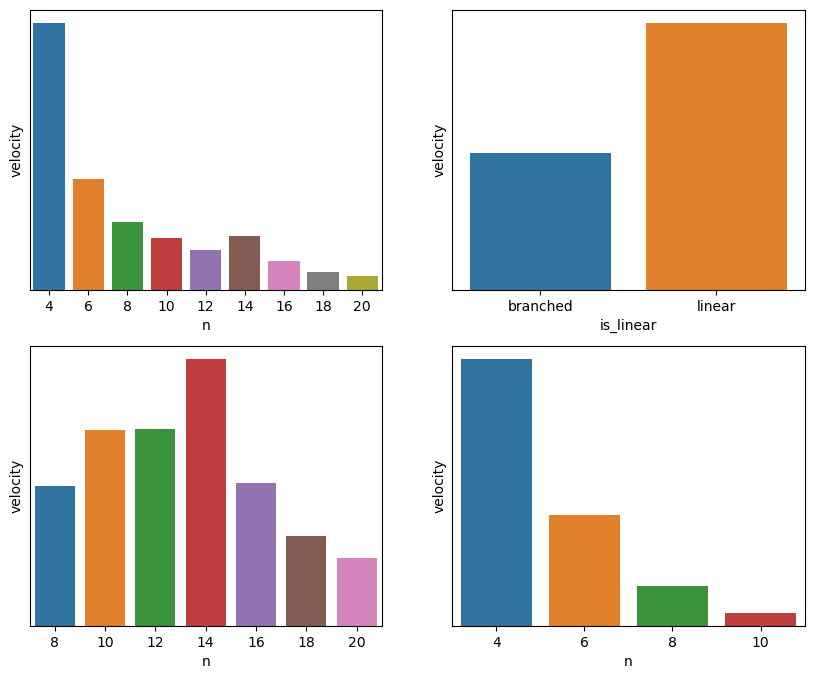

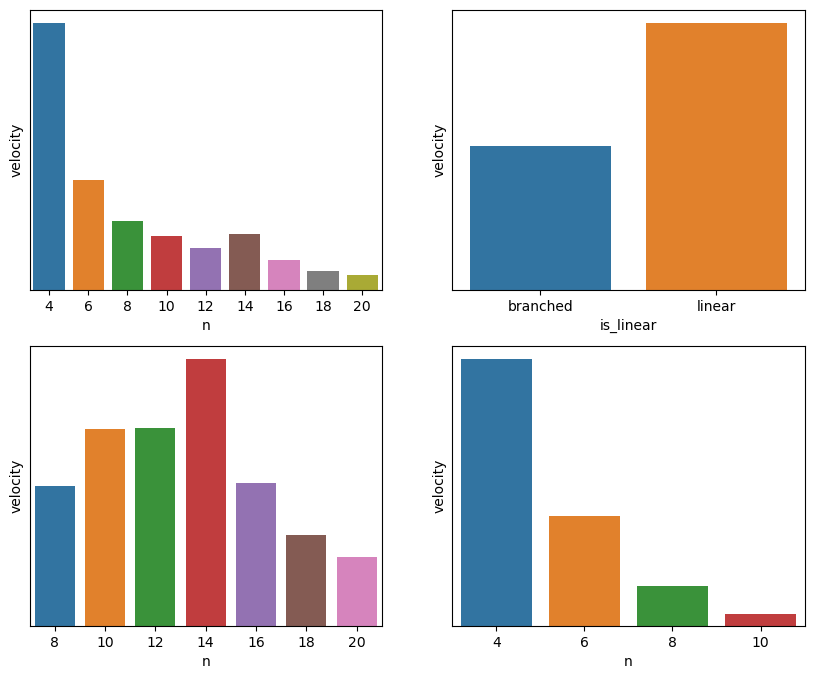

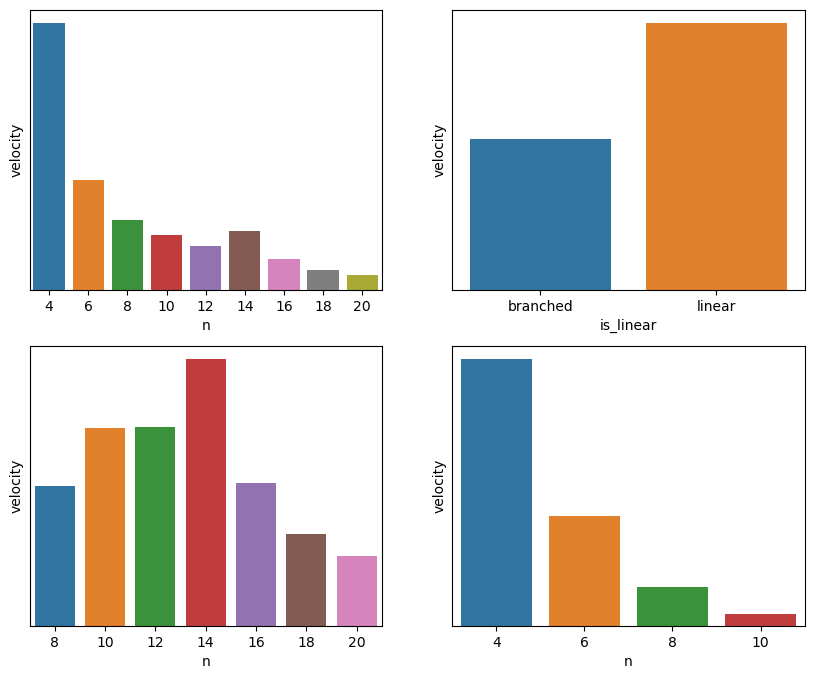

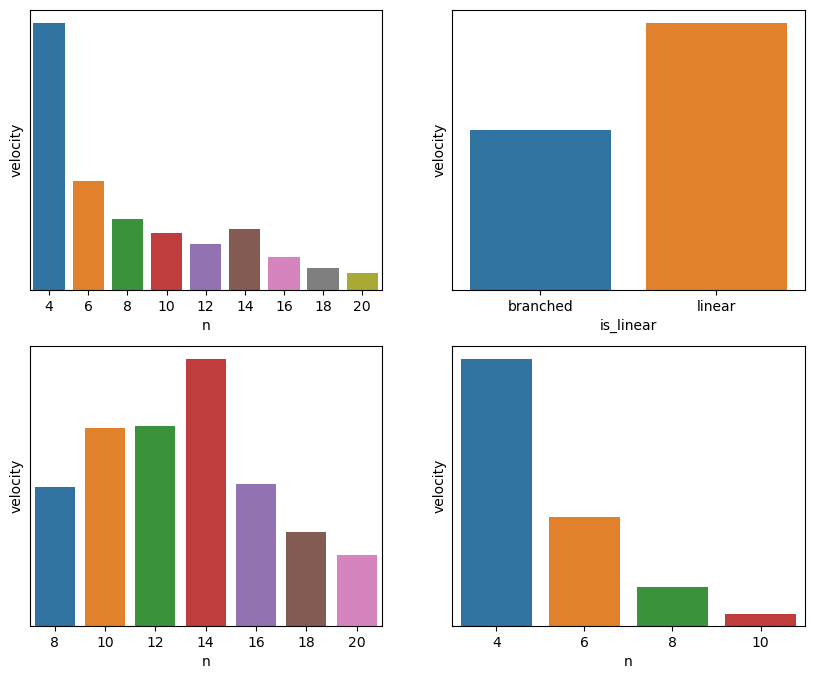

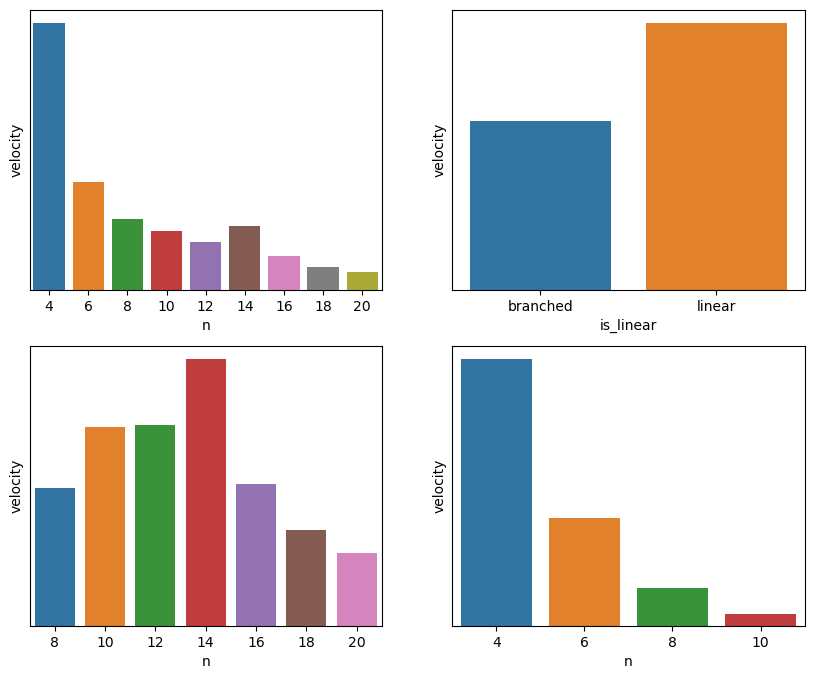

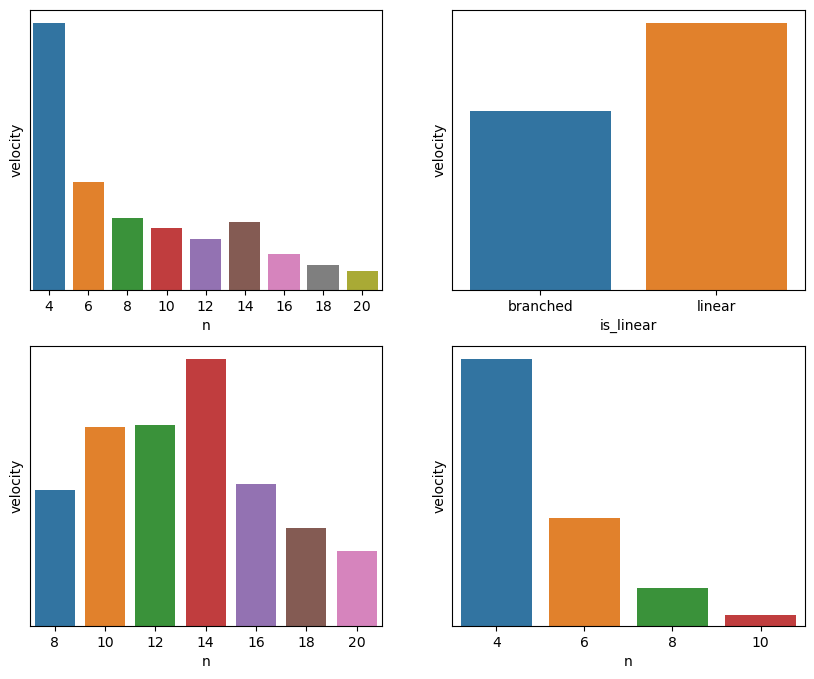

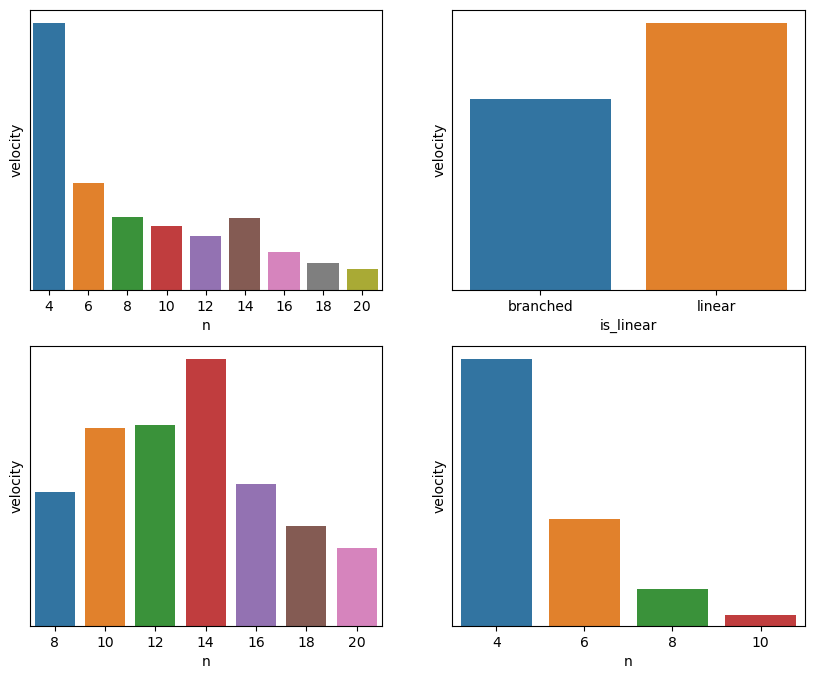

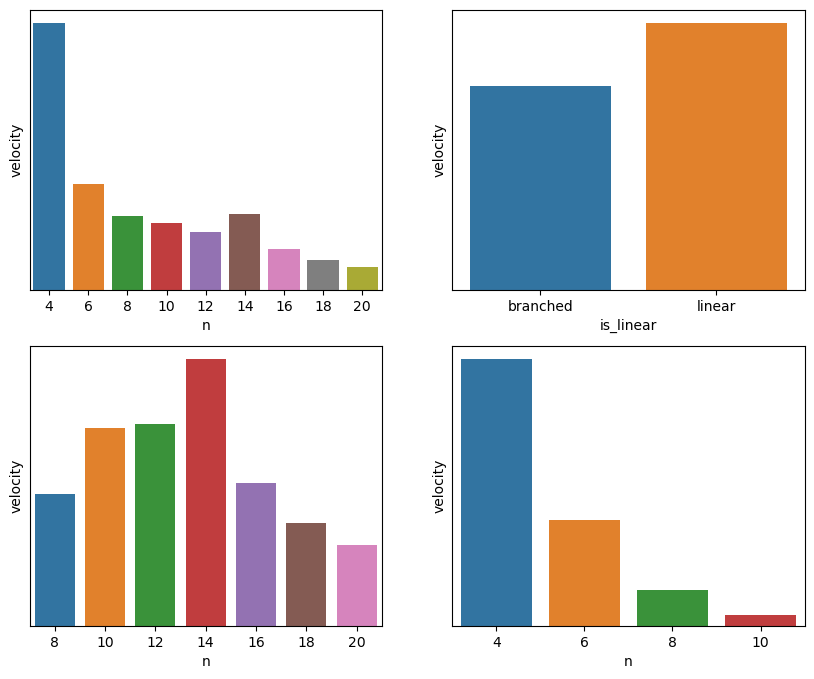

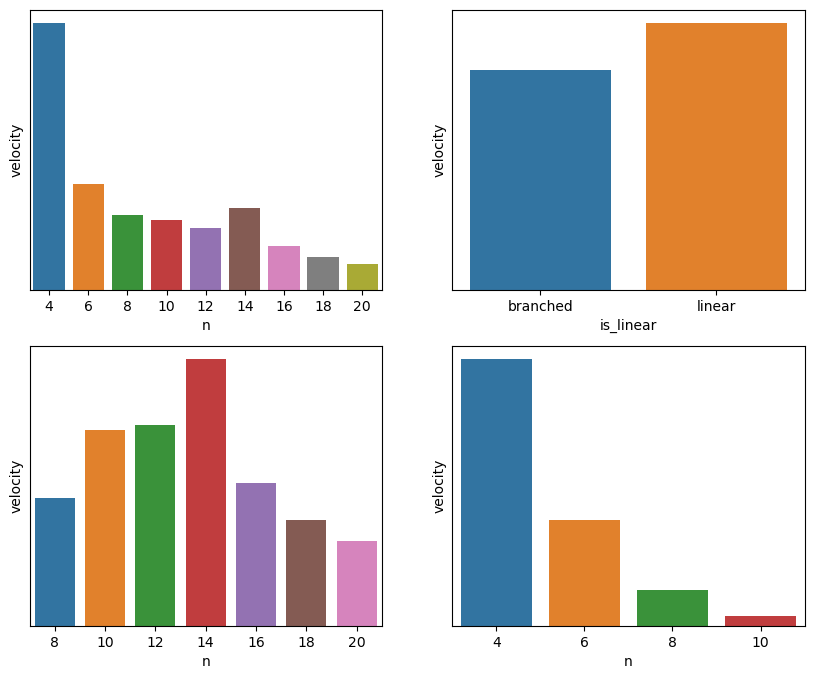

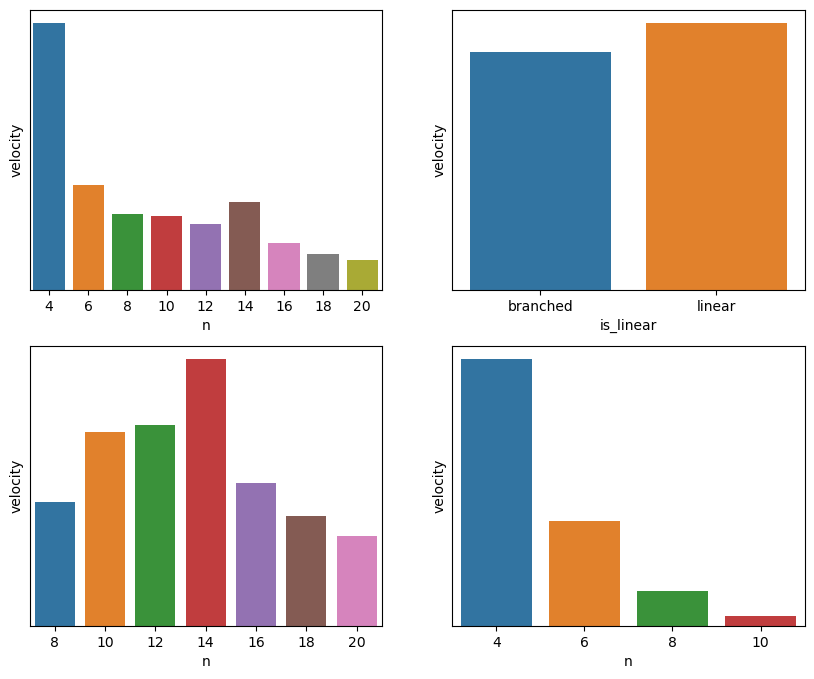

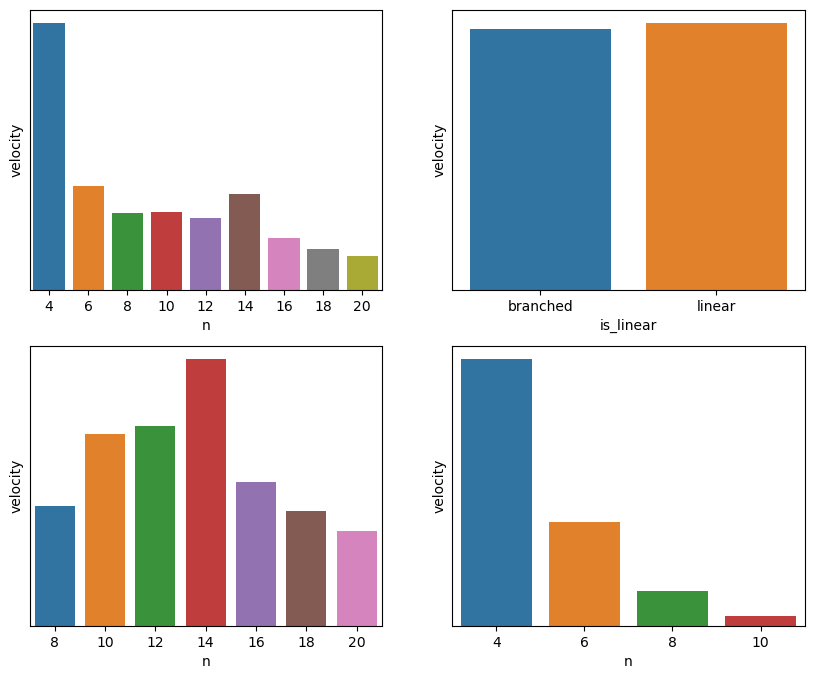

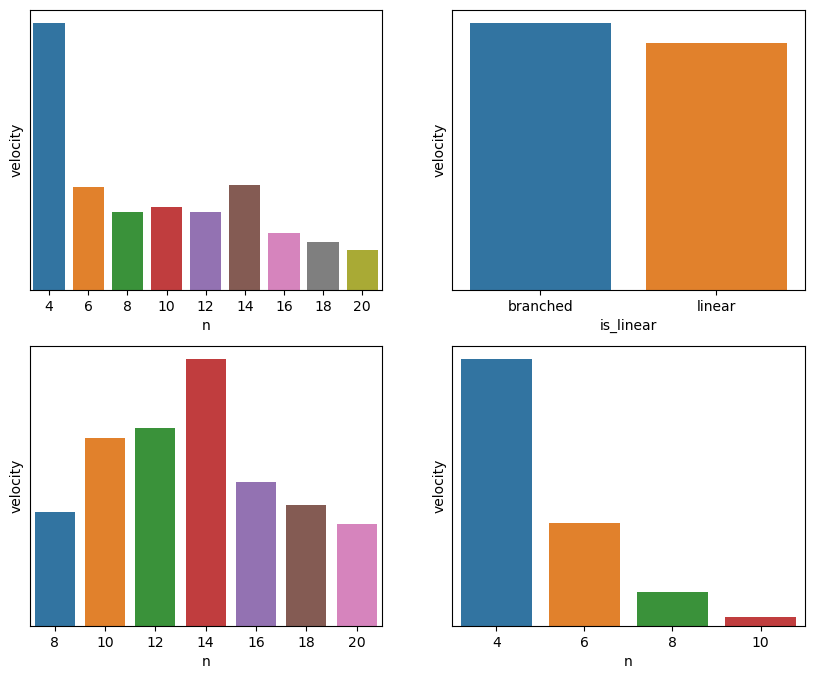

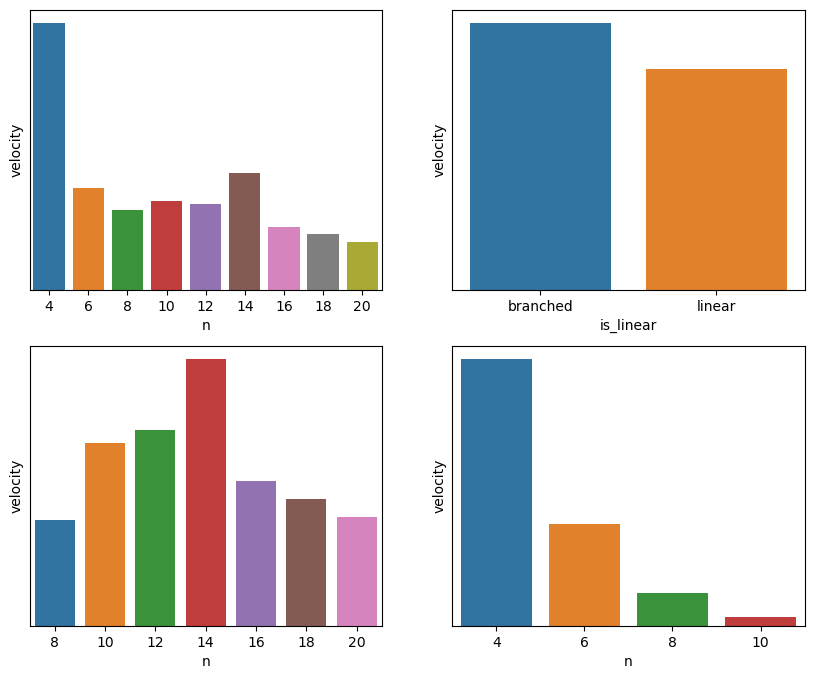

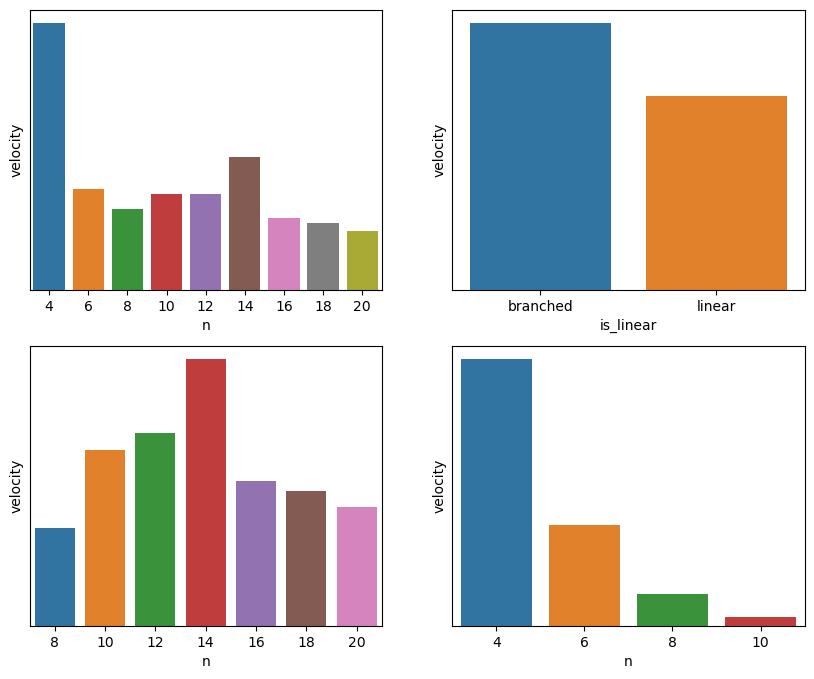

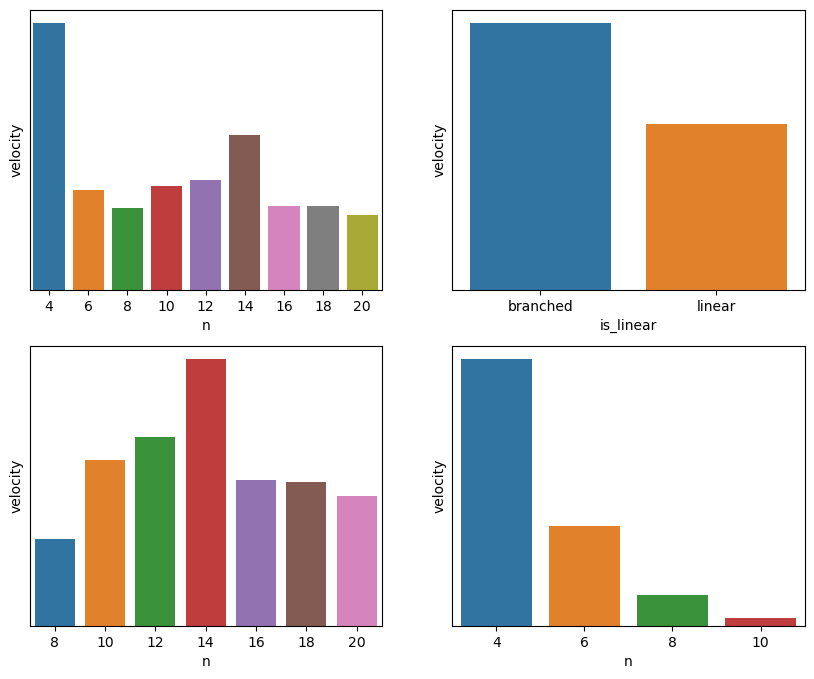

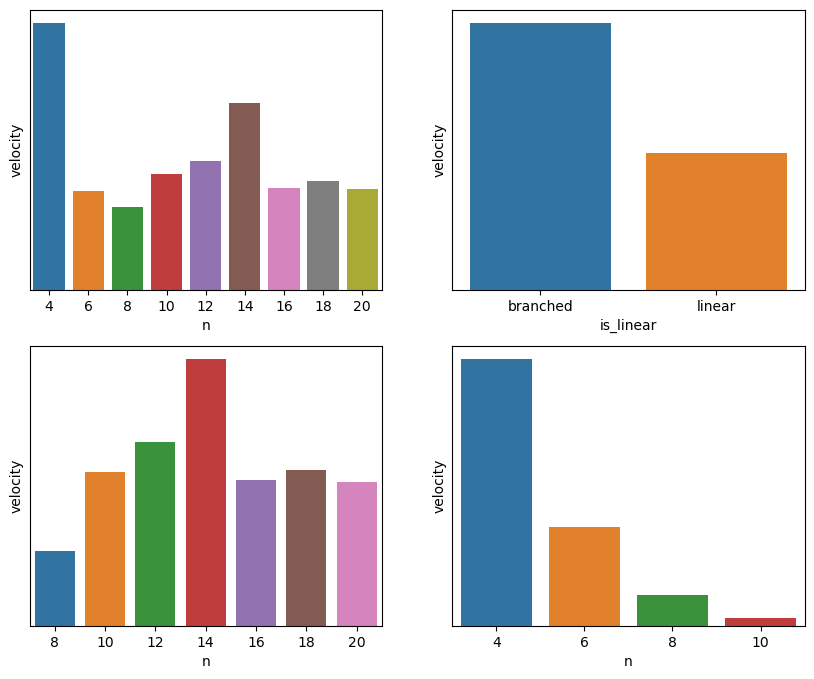

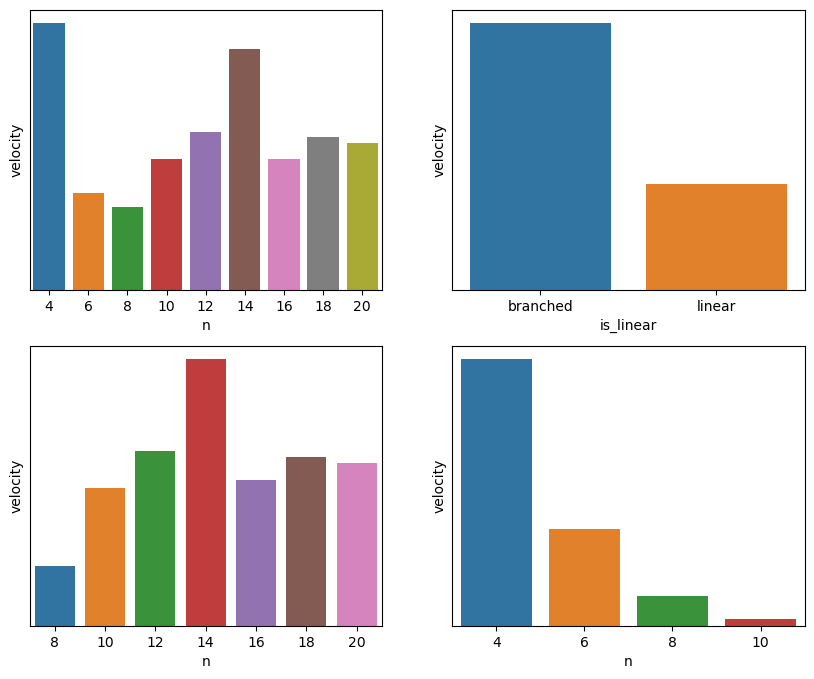

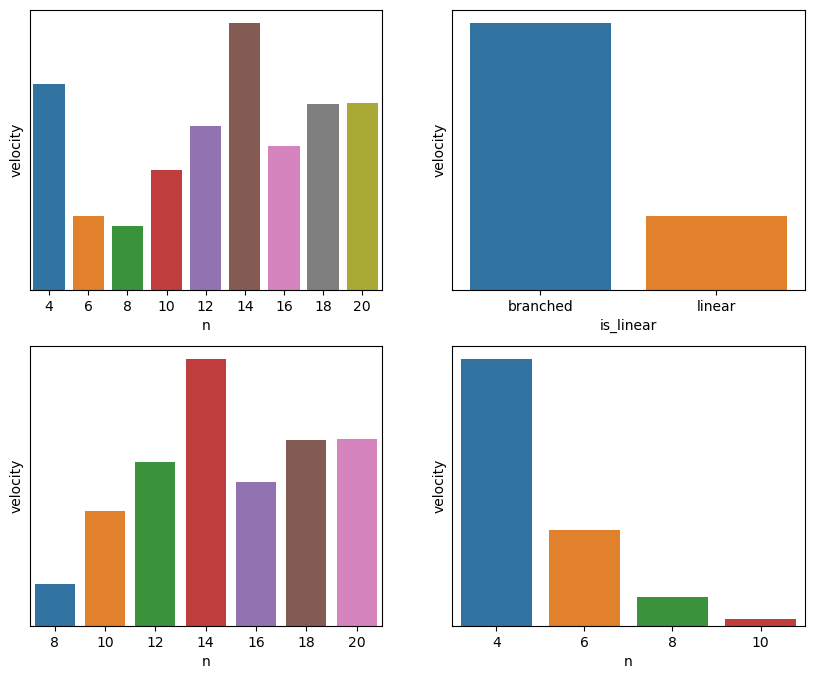

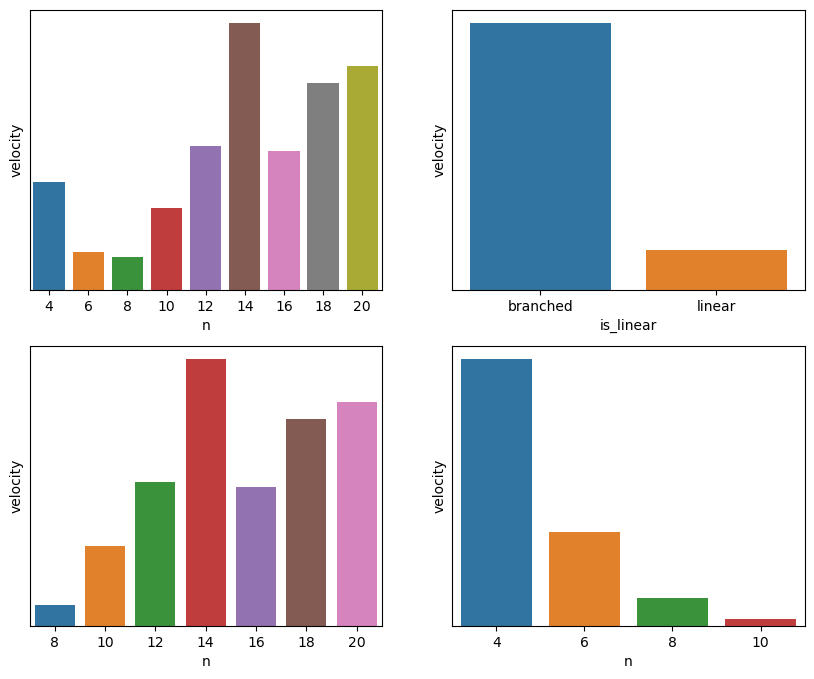

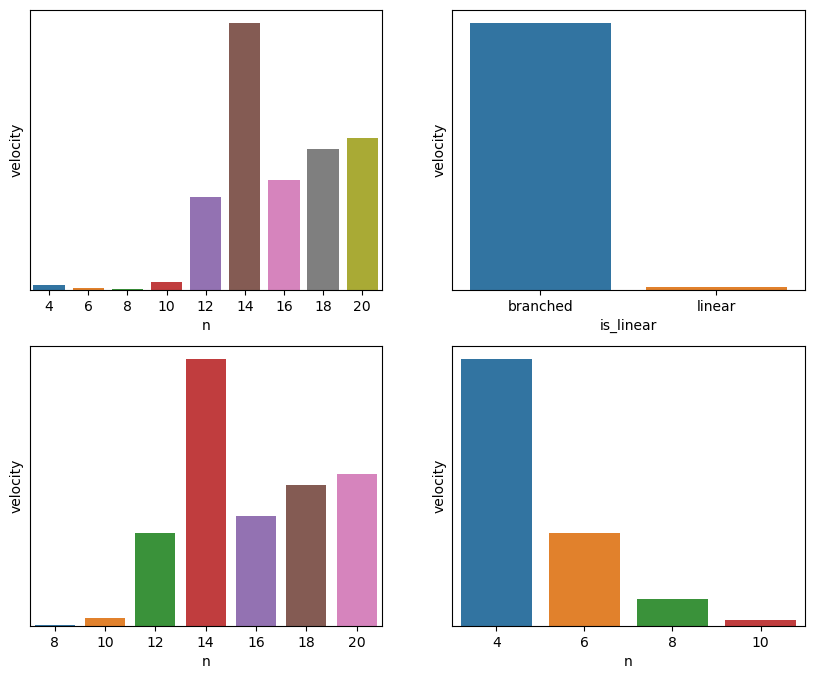

In [5]:
df = pd.DataFrame()
for cnt, d0 in enumerate(np.linspace(1e-2, 1e-5, 20)):
    d1 = d0 * 0.1
    d_linear = np.linspace(d0, d0 * 0.1, 4)
    d_branched = np.linspace(d1, d1 * 0.1, 28)

    dft = get_analysis(d_linear, d_branched, k_grow_bas=k_grow_bas, 
                                    k_death_bas=k_death_bas, 
                                    k_grow_bas_br=k_grow_bas_br, 
                                    k_death_bas_br=k_death_bas_br,
                                    k_grow_ni=k_grow_ni,
                                    k_death_ni=k_death_ni)
                                    
    plot_distribution(dft, f'{d0}')
    dft['d0'] = d0
    df = pd.concat([df, dft])

In [6]:
import duckdb
con = duckdb.connect(database=':memory:', read_only=False)
df.head()

,name,velocity,n,is_linear,d0
35,C10_0_diff,0.000067,10,False,0.01
37,C10_1_diff,0.000072,10,False,0.01
38,C10_diff,0.000044,10,True,0.01
40,C12_0_diff,0.000047,12,False,0.01
42,C12_1_diff,0.000043,12,False,0.01


c:\Users\lt0828\AppData\Local\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
c:\Users\lt0828\AppData\Local\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


<ErrorbarContainer object of 3 artists>

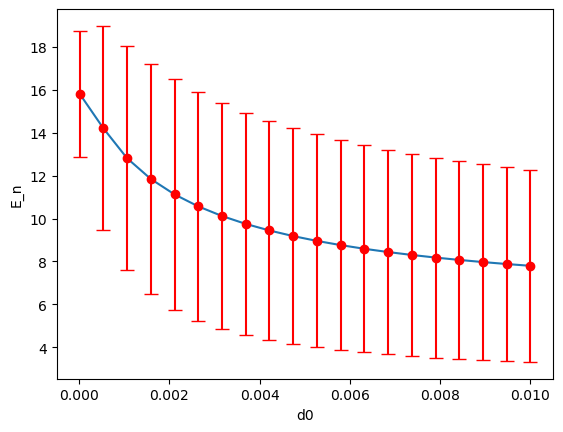

In [7]:
s = '''
with t1 as (select d0, n, sum(velocity) as velocity from df
group by d0, n),
t2 as (select d0, sum(velocity) as velocity from t1
group by d0),
t3 as 
(select t1.d0, t1.n, t1.velocity/t2.velocity as p from t1
left join t2 on t1.d0 = t2.d0)

select d0, sum(n * p) as E_n, (sum(n ** 2 * p) - sum(n * p) ** 2) ** 0.5 as std from t3
group by d0
'''
dft = con.execute(s).df()
sns.lineplot(x='d0', y='E_n', data=dft, errorbar='sd', err_style='bars', err_kws={'capsize': 5})
plt.errorbar(dft['d0'], dft['E_n'], yerr=dft['std'], fmt='o', color='red', capsize=5)

c:\Users\lt0828\AppData\Local\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
c:\Users\lt0828\AppData\Local\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


<ErrorbarContainer object of 3 artists>

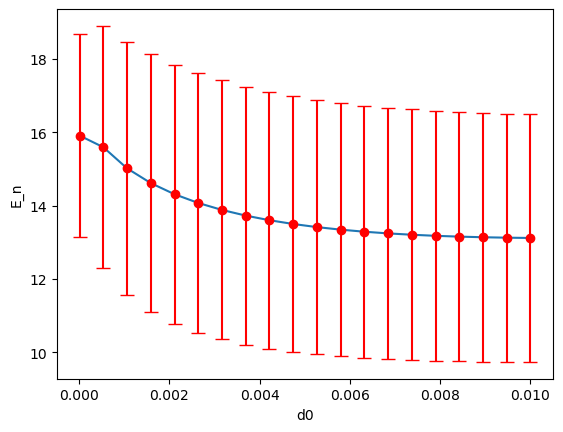

In [8]:
s = '''
with t1 as (select d0, n, sum(velocity) as velocity from df where not is_linear
group by d0, n
),
t2 as (select d0, sum(velocity) as velocity from t1
group by d0),
t3 as 
(select t1.d0, t1.n, t1.velocity/t2.velocity as p from t1
left join t2 on t1.d0 = t2.d0)

select d0, sum(n * p) as E_n, (sum(n ** 2 * p) - sum(n * p) ** 2) ** 0.5 as std from t3
group by d0
'''
dft = con.execute(s).df()
sns.lineplot(x='d0', y='E_n', data=dft, errorbar='sd', err_style='bars', err_kws={'capsize': 5})
plt.errorbar(dft['d0'], dft['E_n'], yerr=dft['std'], fmt='o', color='red', capsize=5)

<Axes: xlabel='d0', ylabel='branched_part'>

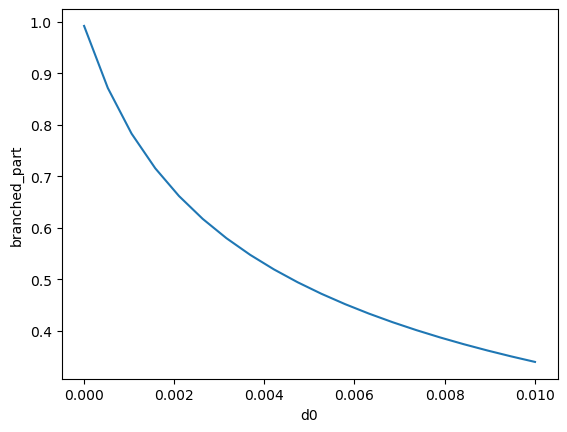

In [9]:
s = '''
with t1 as (select d0, is_linear, sum(velocity) as velocity from df
group by d0, is_linear),
t2 as (select d0, sum(velocity) as velocity from t1
group by d0),
t3 as 
(select t1.d0, t1.is_linear, t1.velocity/t2.velocity as branched_part from t1
left join t2 on t1.d0 = t2.d0)

select * from t3 where not is_linear
'''
sns.lineplot(con.execute(s).df(), x='d0', y='branched_part')

# Influence of diffusion of intermedian products to another catalic site

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import seaborn as sns
from reactor import Reaction
np.random.seed(42)

def get_analysis(
                d_linear, d_branched,
                d_linear_bas,
                k_grow_bas, k_death_bas,
                k_grow_ni, k_death_ni,
                ):

    reaction_list = [
                    ['Ni + C2 <-> NiC2',    k_grow_ni[0], k_grow_ni[0] * 0.1],
                    ['NiC2 + C2 <-> NiC4',   k_grow_ni[1], k_grow_ni[1] * 0.1],['NiC4 -> C4 + Ni',      k_death_ni[0]],
                    ['NiC4 + C2 <-> NiC6',   k_grow_ni[2], k_grow_ni[2] * 0.1],['NiC6 -> C6 + Ni',      k_death_ni[1]],
                    ['NiC6 + C2 <-> NiC8',   k_grow_ni[3], k_grow_ni[3] * 0.1],['NiC8 -> C8 + Ni',      k_death_ni[2]],
                    ['NiC8 + C2 <-> NiC10',  k_grow_ni[4], k_grow_ni[4] * 0.1],['NiC10 -> C10 + Ni',    k_death_ni[3]],
                    
                    ['C4 -> C4_diff', d_linear[0]], ['C6 -> C6_diff', d_linear[1]], ['C8 -> C8_diff', d_linear[2]], ['C10 -> C10_diff', d_linear[3]],
                    ['C4 -> C4_diff', d_linear[0]], ['C6 -> C6_diff', d_linear[1]], ['C8 -> C8_diff', d_linear[2]], ['C10 -> C10_diff', d_linear[3]],
                    ['C4 -> C4_bas', d_linear_bas[0]], ['C6 -> C6_bas', d_linear_bas[1]], ['C8 -> C8_bas', d_linear_bas[2]], ['C10 -> C10_bas', d_linear_bas[3]],
                    
                    ['Bas + C4_bas <-> BasC4_0',         k_grow_bas[0, 0], k_grow_bas[0, 0] * 0.1],
                    ['BasC4_0 + C4_bas <-> BasC8_0',     k_grow_bas[0, 1], k_grow_bas[0, 1] * 0.1],['BasC8_0 -> C8_0 + Bas',     k_death_bas[0, 0]],
                    ['BasC4_0 + C6_bas <-> BasC10_0',    k_grow_bas[0, 2], k_grow_bas[0, 2] * 0.1],['BasC10_0 -> C10_0 + Bas',   k_death_bas[0, 1]],
                    ['BasC4_0 + C8_bas <-> BasC12_0',    k_grow_bas[0, 3], k_grow_bas[0, 3] * 0.1],['BasC12_0 -> C12_0 + Bas',   k_death_bas[0, 2]],
                    ['BasC4_0 + C10_bas <-> BasC14_0',   k_grow_bas[0, 4], k_grow_bas[0, 4] * 0.1],['BasC14_0 -> C14_0 + Bas',   k_death_bas[0, 3]],

                    ['Bas + C6_bas <-> BasC6_1',         k_grow_bas[1, 0], k_grow_bas[1, 0] * 0.1],
                    ['BasC6_1 + C4_bas <-> BasC10_1',    k_grow_bas[1, 1], k_grow_bas[1, 1] * 0.1],['BasC10_1 -> C10_1 + Bas',   k_death_bas[1, 0]],
                    ['BasC6_1 + C6_bas <-> BasC12_1',    k_grow_bas[1, 2], k_grow_bas[1, 2] * 0.1],['BasC12_1 -> C12_1 + Bas',   k_death_bas[1, 1]],
                    ['BasC6_1 + C8_bas <-> BasC14_1',    k_grow_bas[1, 3], k_grow_bas[1, 3] * 0.1],['BasC14_1 -> C14_1 + Bas',   k_death_bas[1, 2]],
                    ['BasC6_1 + C10_bas <-> BasC16_1',   k_grow_bas[1, 4], k_grow_bas[1, 4] * 0.1],['BasC16_1 -> C16_1 + Bas',   k_death_bas[1, 3]],

                    ['Bas + C8_bas <-> BasC8_2',         k_grow_bas[2, 0], k_grow_bas[2, 0] * 0.1],
                    ['BasC8_2 + C4_bas <-> BasC12_2',    k_grow_bas[2, 1], k_grow_bas[2, 1] * 0.1],['BasC12_2 -> C12_2 + Bas',   k_death_bas[2, 0]],
                    ['BasC8_2 + C6_bas <-> BasC14_2',    k_grow_bas[2, 2], k_grow_bas[2, 2] * 0.1],['BasC14_2 -> C14_2 + Bas',   k_death_bas[2, 1]],
                    ['BasC8_2 + C8_bas <-> BasC16_2',    k_grow_bas[2, 3], k_grow_bas[2, 3] * 0.1],['BasC16_2 -> C16_2 + Bas',   k_death_bas[2, 2]],
                    ['BasC8_2 + C10_bas <-> BasC18_2',   k_grow_bas[2, 4], k_grow_bas[2, 4] * 0.1],['BasC18_2 -> C18_2 + Bas',   k_death_bas[2, 3]],

                    ['Bas + C10_bas <-> BasC10_3',       k_grow_bas[3, 0], k_grow_bas[3, 0] * 0.1],
                    ['BasC10_3 + C4_bas <-> BasC14_3',   k_grow_bas[3, 1], k_grow_bas[3, 1] * 0.1],['BasC14_3 -> C14_3 + Bas',   k_death_bas[3, 0]],
                    ['BasC10_3 + C6_bas <-> BasC16_3',   k_grow_bas[3, 2], k_grow_bas[3, 2] * 0.1],['BasC16_3 -> C16_3 + Bas',   k_death_bas[3, 1]],
                    ['BasC10_3 + C8_bas <-> BasC18_3',   k_grow_bas[3, 3], k_grow_bas[3, 3] * 0.1],['BasC18_3 -> C18_3 + Bas',   k_death_bas[3, 2]],
                    ['BasC10_3 + C10_bas <-> BasC20_3',  k_grow_bas[3, 4], k_grow_bas[3, 4] * 0.1],['BasC20_3 -> C20_3 + Bas',   k_death_bas[3, 3]],

                    ['C8_0 -> C8_0_diff',   d_branched[0]],  ['C10_0 -> C10_0_diff', d_branched[1]],  ['C12_0 -> C12_0_diff', d_branched[2]],  ['C14_0 -> C14_0_diff', d_branched[3]],
                    ['C10_1 -> C10_1_diff', d_branched[4]],  ['C12_1 -> C12_1_diff', d_branched[5]],  ['C14_1 -> C14_1_diff', d_branched[6]],  ['C16_1 -> C16_1_diff', d_branched[7]],
                    ['C12_2 -> C12_2_diff', d_branched[8]],  ['C14_2 -> C14_2_diff', d_branched[9]],  ['C16_2 -> C16_2_diff', d_branched[10]], ['C18_2 -> C18_2_diff', d_branched[11]],
                    ['C14_3 -> C14_3_diff', d_branched[12]], ['C16_3 -> C16_3_diff', d_branched[13]], ['C18_3 -> C18_3_diff', d_branched[14]], ['C20_3 -> C20_3_diff', d_branched[15]],
                    ]

    reaction = Reaction(reaction_list, fixed_concentrations=['C2'])

    dt = 5
    total_time = 1000_000

    solution = reaction.solve({'C2': 1, 'Ni': 1, 'Bas': 1}, np.arange(0, total_time, dt))
    vel = solution.diff().applymap(lambda x: x/dt).iloc[int(solution.shape[0] * 0.75):]
    columns = vel.max()[vel.std() > np.quantile(vel.std(), 0.9)].index
    # if vel.std().max() > 1e-8:
    #     sns.lineplot(solution[columns])
    
    df = vel.mean().reset_index().rename(columns={'index': 'name', 0: 'velocity'})
    df = df[df.name.str.contains('diff')]
    df = df.assign(n=df.name.str.extract(r'C(\d+)').astype(int),
                is_linear=~df.name.str.contains(r'_.*_'))
                
    return df


def plot_distribution(df, name):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    
    sns.barplot(df.groupby('n').velocity.sum().reset_index(), x='n', y='velocity', ax=axs[0, 0])
    sns.barplot(df.groupby('is_linear').velocity.sum().reset_index(), x='is_linear', y='velocity', ax=axs[0, 1])
    
    sns.barplot(df[~df.is_linear].groupby('n').velocity.sum().reset_index(), x='n', y='velocity', ax=axs[1, 0])
    sns.barplot(df[df.is_linear].groupby('n').velocity.sum().reset_index(), x='n', y='velocity', ax=axs[1, 1])

    axs[0, 1].set_xticks([0, 1])
    axs[0, 1].set_xticklabels(['branched', 'linear'])
    for i in range(2):
        for j in range(2):
            axs[i, j].set_yticks([])

    fig.savefig(f'files/distribution_{name}.png')



k_grow_bas = np.random.normal(1e-2, 1e-4, size=(4, 5))
k_grow_bas = np.where(k_grow_bas < 0, 1e-4, k_grow_bas)

k_death_bas = np.random.normal(1e-2, 1e-4, size=(4, 4))
k_death_bas = np.where(k_death_bas < 0, 1e-4, k_death_bas)

k_grow_bas_br = np.random.normal(5e-3, 1e-5, size=(1, 12))
k_grow_bas_br = np.where(k_grow_bas_br < 0, 1e-5, k_grow_bas_br)

k_death_bas_br = np.random.normal(1e-2, 1e-5, size=(1, 12))
k_death_bas_br = np.where(k_death_bas_br < 0, 1e-4, k_death_bas_br)

k_grow_ni = np.array([1e-2]*5)

k_death_ni = np.array([1e-2]*5)